# Noise removal from images
This project was a part of **Data Science Specialization** by **E&ICT ACADEMY IIT ROORKEE** and [**CLOUDXLAB**](http://cloudxlab.com/). This project is a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

Here we'll build a system that removes noise from images. It will take as input a noisy digit image, and it will output a clean digit image, represented as an array of pixel intensities, just like the MNIST images.

Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

**Objectives:**

For this example we'll be adding noise to our MNIST dataset. We will be generating random integer using randint() and adding to original image.

In [1]:
# fetch MNIST dataset
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', cache=True)

mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

To view the image of a single digit,all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

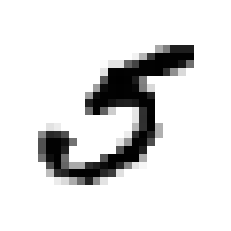

(70000,)

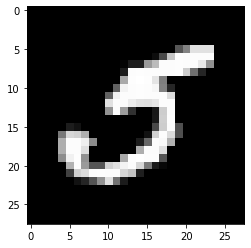

In [2]:
# view image 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

plt.imshow(255-some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

some_digit_image.shape
X[36000].shape
y[36000]
y.shape

We need to split the data into test and train data. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [3]:
# split the data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Also we need to shuffle our training data so that it ensures that we don't miss out any digit in a cross validation fold.

In [4]:
#shuffle the data
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
# trim the data since KNN takes a lot of time
X_train = X_train[:30000]
y_train = y_train[:30000]

X_test = X_test[:5000]
y_test = y_test[:5000]

# Put noise in the image
import numpy.random as rnd

noise_train = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

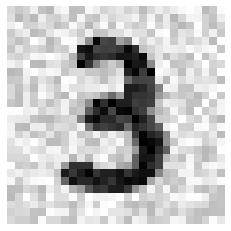

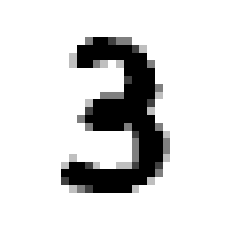

In [6]:
# lets view the noisy image
def plot_digit(array):
    array_image = array.reshape(28, 28)
    plt.imshow(array_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

plot_digit(X_test_mod[4000])

plot_digit(y_test_mod[4000])

Now we need to clean the image using KNN classifier. It is an example of Multioutput classification. A single label is Multilabel as it has 784 classes and each of the 784 pixel can have values from 0 to 255, hence it is a Multioutput classification example.

Image after cleaning


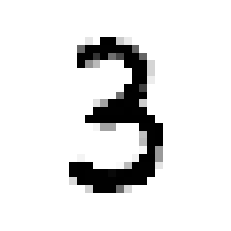

None


In [7]:
# clean the image using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[4000]])
print("Image after cleaning")
print(plot_digit(clean_digit))